In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Feature matching (as opposed) to template matching does not require having the exact image at hand to be able to track it.
#Brute-Force Matching with ORB Descriptors
#Brute-Force Matching with SIFT Descriptors and Ratio test
#FLANN based matcher

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [9]:
reeses = cv2.imread('CV_Python/DATA/reeses_puffs.png',0)

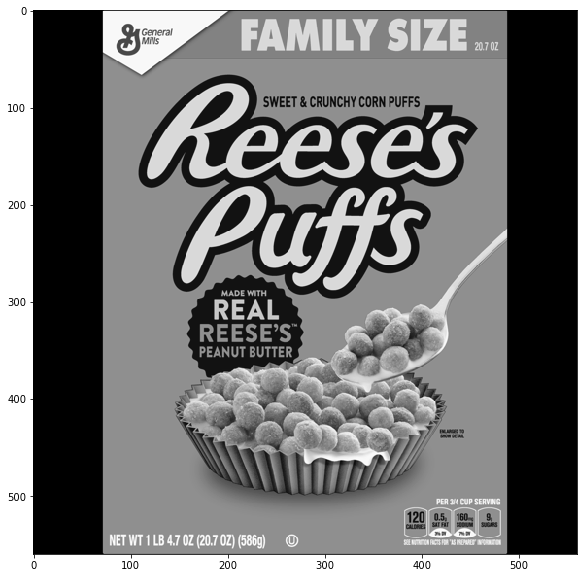

In [10]:
display(reeses)

In [12]:
cereals = cv2.imread('CV_Python/DATA/many_cereals.jpg',0)

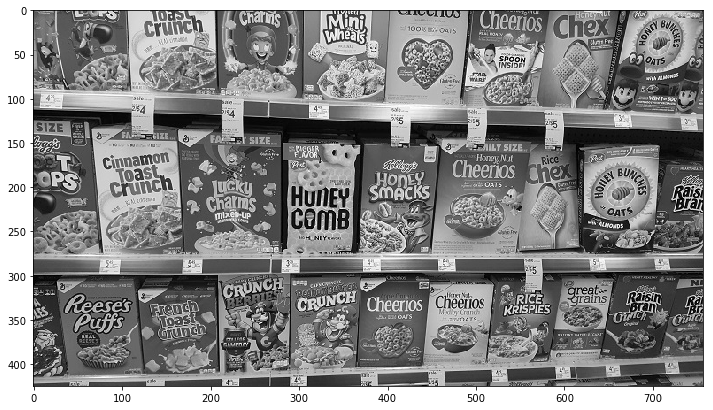

In [14]:
display(cereals)

In [15]:
#BRUTE_FORCE DETECTION
orb = cv2.ORB_create()

In [16]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [19]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)

In [23]:
single_match = matches[0]

In [24]:
single_match


<DMatch 00000179E01FCBF0>

In [26]:
single_match.distance

78.0

In [27]:
matches = sorted(matches,key=lambda x:x.distance)

In [30]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:40],None,flags=2)

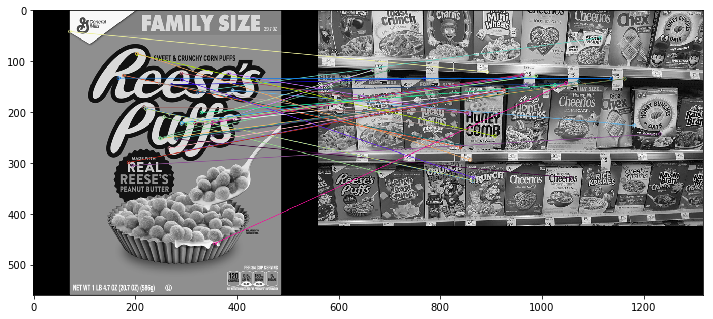

In [31]:
display(reeses_matches)
#didn't work really well since none of them point to reeses puffs

In [32]:
#########################################################################

#SIFT
#Scale Invariant Feature Transform

########################################################################


In [33]:
sift = cv2.xfeatures2d.SIFT_create()

In [34]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [35]:
bf = cv2.BFMatcher()

In [36]:
des1

array([[ 15.,   0.,   0., ...,  11.,   1.,   0.],
       [ 21.,   0.,   0., ...,   0.,  10.,  13.],
       [150.,   1.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 61.,   6.,   0., ...,   0.,   0.,   0.],
       [ 27.,   0.,   0., ...,   0.,   0.,   0.],
       [ 48.,   0.,   0., ...,   0.,   1.,   0.]], dtype=float32)

In [49]:
matches = bf.knnMatch(des1,des2,k=3)

In [50]:
good = []

#less distance means a better match
#Ratio match1 < 75% Match2
for match1,match2,match3 in matches:
    #if match1 distance is less than 75% of match2 distance
    #then we'll keep it
    
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [52]:
len(good)

78

In [53]:
len(matches)

1500

In [54]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

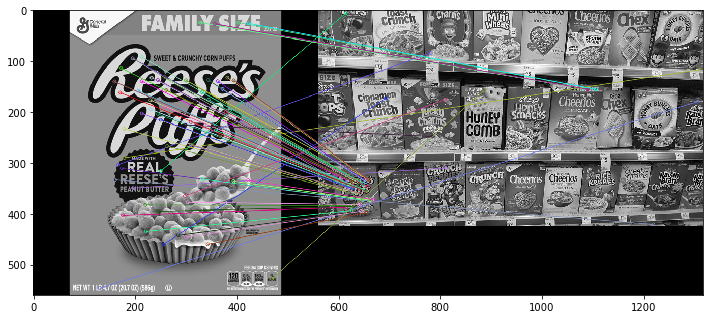

In [55]:
display(sift_matches)

In [60]:
###########################################################################
# FLANN BASED MATCHING
#Fast Library for Approximately Nearest Neighbours
# much faster but not necessarily the best

In [61]:
sift = cv2.xfeatures2d.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [62]:
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [77]:
#FlannBasedMatcher is faster than the brute force in finding the matches
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [78]:
matchesMask = [[0,0] for i in range(len(matches))]

In [87]:
#good = []

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]
        

In [91]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

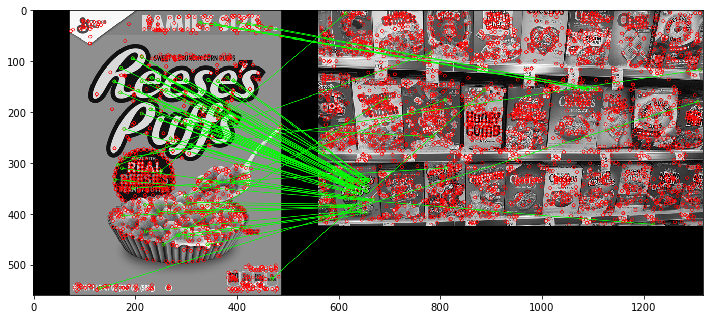

In [92]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)

In [85]:
#matchesMask